# *MATH2319 Machine Learning*

# Semester 1, 2021

# Phase-1


# Table of Contents
- [Introduction](#Intro)
- [Data](#Data)
  + [Data Overview](#DataO)
  + [Importing Packages and Data](#DataP)
- [Data Preparation](#DP)
  + [Dropping ID column](#DID)
  + [Data Types](#DT)
  + [Summary of Dataset](#SUM)
  + [Missing Values](#MV)
- [Data Visualisation](#DV)
  + [Univariate Visualisation](#UV)
  + [Bivariate Visualisation](#BV)
  + [Three Plot Variable Visualisation](#TV)
- [References](#R)

# Introduction <a name="Intro"></a>

Taiwan's economy expanded steadily throughout the 1990s, almost doubling in value along with the other Asian Tiger countries. During this period, the country's finance sector was deeply engaged in the development of real estate. However, in the early 2000s, this development slowed, and Taiwanese banks turned to consumer credit to keep the expansion going. As a consequence, credit standards were relaxed, and customers were allowed to invest by borrowing money.[1](#1) <br>

Credit card companies in Taiwan experienced a cash and credit card default crisis in 2005, with delinquency forecast to peak in the third quarter of 2006. Card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants in order to maximise market share. Simultaneously, most cardholders, regardless of redemption capacity, overused credit cards for spending purposes.Around the same time, most cardholders, regardless of redemption capacity, overused credit cards for consumption and accrued significant cash and credit card debts. This recession shook customer interest and posed a significant threat for both banks and cardholders (Hille, K.,2005, September 27)).<br>

Based on the facts stated above, our aim for this project is to prepare the Taiwan's Credit Card Customer defaults data, Visualize and Explore the data for a better understanding of all the Demographic and Fianncial variables' impact on the clients default payments in Taiwan and identitfy they key drivers that determineis likelihood.<br>


# Data <a name="Data"></a>

## Data Overview <a name="DataO"></a>

This dataset includes information on default charges, demographic characteristics, credit records, payment history, and bill statements for credit card clients in Taiwan from April 2005 to September 2005,. The data set is derived from the [UCI Machine Learning Repositry](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients).<br>

The dataset consists of 30000 obeservations and the following attributes were recorded <br>

**ID**:        ID of each client<br>
**LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit)<br>
**SEX**:       Gender (1=male, 2=female)<br>
**EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others)<br>
**MARRIAGE**:  Marital status (1=married, 2=single, 3=others)<br>
**AGE**:       Age in years<br>
**PAY_0**:     Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,           8=payment delay for eight months, 9=payment delay for nine months and above)<br>
**PAY_2**:     Repayment status in August, 2005 (scale same as above)<br>
**PAY_3**:     Repayment status in July, 2005 (scale same as above)<br>
**PAY_4**:     Repayment status in June, 2005 (scale same as above)<br>
**PAY_5**:     Repayment status in May, 2005 (scale same as above)<br>
**PAY_6**:     Repayment status in April, 2005 (scale same as above)<br>
**BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)<br>
**BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)<br>
**BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)<br>
**BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)<br>
**BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)<br>
**BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)<br>
**PAY_AMT1**:  Amount of previous payment in September, 2005 (NT dollar)<br>
**PAY_AMT2**:  Amount of previous payment in August, 2005 (NT dollar)<br>
**PAY_AMT3**:  Amount of previous payment in July, 2005 (NT dollar)<br>
**PAY_AMT4**:  Amount of previous payment in June, 2005 (NT dollar)<br>
**PAY_AMT5**:  Amount of previous payment in May, 2005 (NT dollar)<br>
**PAY_AMT6**:  Amount of previous payment in April, 2005 (NT dollar)<br>
**default.payment.next.month**: Default payment (1=yes, 0=no)<br>



## Importing Packages and Data <a name="DataP"></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn import preprocessing

The dataset is saved in a CSV file and read using the pandas funciton.<br>

We see that the dataset consists of 30000 rows and 25 columns.

In [2]:
dataset = pd.read_csv('UCI_Credit_Card.csv', sep = ',' )
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
dataset.shape

(30000, 25)

# Data Preparation <a name="DP"></a>

### Dropping ID column <a name="DID"></a>

In this dataset, *ID* column is not required and therefore we'll be dropping the column.

In [4]:
df = dataset.drop(columns=['ID'])
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Data Types <a name="DT"></a>

**Checking the Data types of all the variables of the dataframe**

In [5]:
df.dtypes

LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

**Changing the data types**

Columns SEX, EDUCATION, MARRIAGE, PAY_0, PAY_2 ...PAY_6, are not integers therefore we change to str.

In [6]:
for col in ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    df[col] = df[col].astype('str')

In [7]:
df.dtypes

LIMIT_BAL                     float64
SEX                            object
EDUCATION                      object
MARRIAGE                       object
AGE                             int64
PAY_0                          object
PAY_2                          object
PAY_3                          object
PAY_4                          object
PAY_5                          object
PAY_6                          object
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

### Summary of the Dataset <a name="SUM"></a>

**Checking the summary of all the variables**

In [8]:
df.describe(include='all')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000,30000,30000,30000.000000,30000,30000,30000,30000,30000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,2,7,4,NaN,11,11,11,11,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2,2,2,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,18112,14030,15964,NaN,14737,15730,15764,16455,16947,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,167484.322667,NaN,NaN,NaN,35.485500,NaN,NaN,NaN,NaN,NaN,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,NaN,NaN,NaN,9.217904,NaN,NaN,NaN,NaN,NaN,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000


**We can observe some inconsistencies in the dataset.**<br>

- EDUCATION is expected to be an integer between 1 and 4. (both inclusive). However, we can see that 0 is also there. These can be updated to 4 ('Others').<br>

- MARRIAGE is expected to be an integer between 1 and 3 (both inclusive). However, we can see 0 is present as well. These can be updated to value 3 ('Others')<br>

- PAY_0 to PAY_6 are seen to be between -2 to 8. However, as per the datadictionary the values should be -1 for paid duly and 1...9 for payment delay of 1 month, 2 month... 9 months and above. There is one way to look at it that the values should be shifted by +1 (so 0 becomes 1, 1 becomes 2... 8 becomes 9). And -2 can be assumed as -1 (duly paid), (i.e -2=-1, -1=-1 (remains the same), 0=1, 1=2, 2=3, 3=4, 4=5, 5=6, 6=7, 7=8, 8=9.)<br>

**Updating the Education and Marriage values as mentioned above.**

In [9]:
df['EDUCATION'] = df['EDUCATION'].replace(['0','5','6'],'4')

df['MARRIAGE'] = df['MARRIAGE'].replace(['0'],'3')

df.describe(include="all")

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000,30000,30000,30000.000000,30000,30000,30000,30000,30000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,2,4,3,NaN,11,11,11,11,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2,2,2,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,18112,14030,15964,NaN,14737,15730,15764,16455,16947,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,167484.322667,NaN,NaN,NaN,35.485500,NaN,NaN,NaN,NaN,NaN,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,NaN,NaN,NaN,9.217904,NaN,NaN,NaN,NaN,NaN,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000


**Updating the PAY_0 to PAY_6 values as mentioned above.**

In [10]:
df['PAY_0'] = df['PAY_0'].replace( { '-2' : -1, '-1' : -1, '0' : 1, '1' : 2, '2' : 3, '3' : 4, '4' : 5, '5' : 6, '6' : 7, '7' : 8, '8' : 9 }, regex = True)

In [11]:
df['PAY_2'] = df['PAY_2'].replace( { '-2' : -1, '-1' : -1,'0' : 1, '1' : 2, '2' : 3, '3' : 4, '4' : 5, '5' : 6, '6' : 7, '7' : 8, '8' : 9 }, regex = True)

In [12]:
df['PAY_3'] = df['PAY_3'].replace( { '-2' : -1, '-1' : -1, '0' : 1, '1' : 2, '2' : 3, '3' : 4, '4' : 5, '5' : 6, '6' : 7, '7' : 8, '8' : 9 }, regex = True)

In [13]:
df['PAY_4'] = df['PAY_4'].replace( { '-2' : -1, '-1' : -1, '0' : 1, '1' : 2, '2' : 3, '3' : 4, '4' : 5, '5' : 6, '6' : 7, '7' : 8, '8' : 9 }, regex = True)

In [14]:
df['PAY_5'] = df['PAY_5'].replace( { '-2' : -1, '-1' : -1, '0' : 1, '1' : 2, '2' : 3, '3' : 4, '4' : 5, '5' : 6, '6' : 7, '7' : 8, '8' : 9 }, regex = True)

In [15]:
df['PAY_6'] = df['PAY_6'].replace( { '-2' : -1, '-1' : -1, '0' : 1, '1' : 2, '2' : 3, '3' : 4, '4' : 5, '5' : 6, '6' : 7, '7' : 8, '8' : 9 }, regex = True)

**Displaying the dataframe with the changed values**

In [16]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,3,3,-1,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,3,1,1,1,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,1,1,1,1,1,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,1,1,1,1,1,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,1,-1,1,1,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,1,1,1,1,1,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,5,4,3,-1,1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,2,-1,1,1,1,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


### Missing Values <a name="mv"></a>


We can see that there are no Missing values in the dataset.

In [17]:
df.isna().sum().sum()

0

# Data Visualisation <a name="DV"></a>

## Univariate Visualisation <a name="UV"></a>

**Distribution of Defaulters**<br>

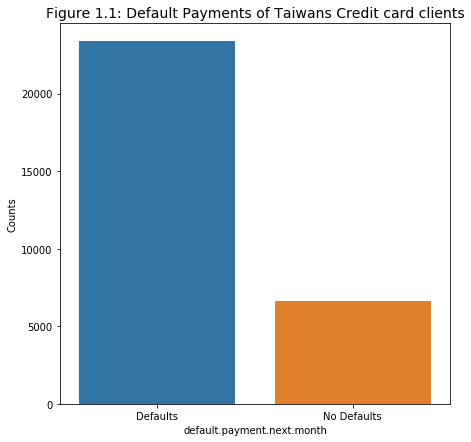

In [18]:
#plot1 Distribution of Defaulters
VC = df["default.payment.next.month"].value_counts()
defaults = pd.DataFrame({'default.payment.next.month': VC.index,'Counts': VC.values})
plt.figure(figsize = (7,7))
plt.title('Figure 1.1: Default Payments of Taiwans Credit card clients', fontsize = 14)
sn.color_palette()
PLOT1 = sn.barplot(x = 'default.payment.next.month', y="Counts", data=defaults)
PLOT1.set_xticklabels(['Defaults','No Defaults'])
plt.show()


From the plot above, we can say that more number of clients will default next month as compared to clients not defaulting.

**Distribution of Gender**<br>


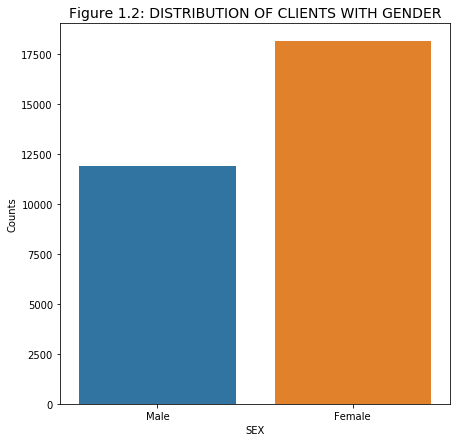

In [19]:
#plot 2 Distribution of Gender

SC = df["SEX"].value_counts()
sex = pd.DataFrame({'SEX': SC.index,'Counts': SC.values})
plt.figure(figsize = (7,7))
plt.title('Figure 1.2: DISTRIBUTION OF CLIENTS WITH GENDER', fontsize = 14)
sn.color_palette()
PLOT2 = sn.barplot(x = 'SEX', y="Counts", data=sex)
PLOT2.set_xticklabels(['Male','Female'])
plt.show()

From the distribution of gender plot we can conclude that there are more number of Female Credit clients as compared to Male in Taiwan.

**Distribution of Clients with Marital Status**<br>

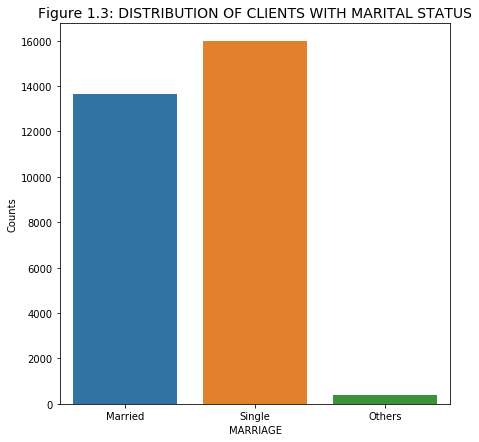

In [20]:
#plot 3 Distribution of Clients with Marital Status

MC = df["MARRIAGE"].value_counts()
marriage = pd.DataFrame({'MARRIAGE': MC.index,'Counts': MC.values})
plt.figure(figsize = (7,7))
plt.title('Figure 1.3: DISTRIBUTION OF CLIENTS WITH MARITAL STATUS', fontsize = 14)
sn.color_palette()
PLOT3 = sn.barplot(x = 'MARRIAGE', y="Counts", data=marriage)
PLOT3.set_xticklabels(['Married','Single','Others'])
plt.show()

We see in the above plot that Single clients default rate tend to be higher compared to Married Clients.

**Distribution of Clients with the Level of Education**<br>

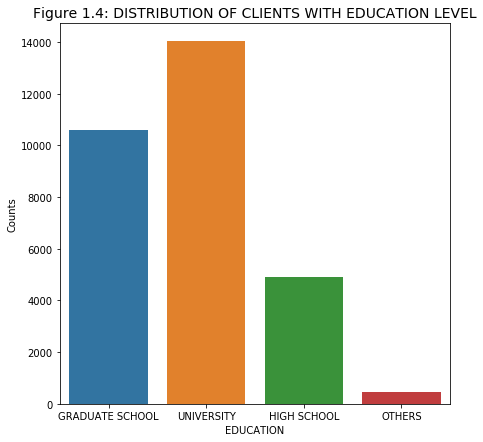

In [21]:
# plot 4 Distribution of Clients with the Level of Education

EC = df["EDUCATION"].value_counts()
education = pd.DataFrame({'EDUCATION': EC.index,'Counts': EC.values})
plt.figure(figsize = (7,7))
plt.title('Figure 1.4: DISTRIBUTION OF CLIENTS WITH EDUCATION LEVEL', fontsize = 14)
sn.color_palette()
PLOT3 = sn.barplot(x = 'EDUCATION', y="Counts", data=education)
PLOT3.set_xticklabels(['GRADUATE SCHOOL','UNIVERSITY', 'HIGH SCHOOL','OTHERS'])
plt.show()

Plots above depicts that there are more percentage of credit clients whose Education is University or Higher.

**DENSITY PLOT OF AMOUNT CREDIT LIMIT** 

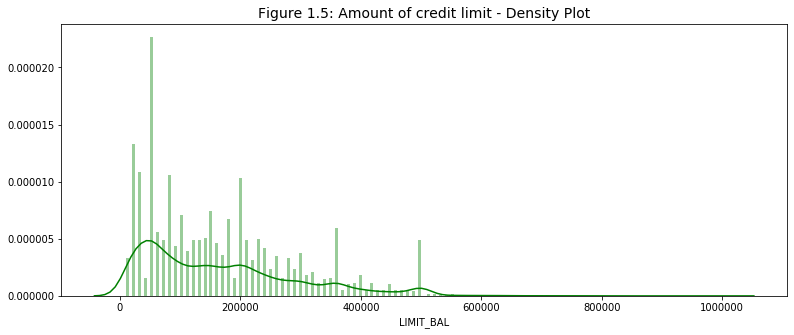

In [22]:
# plot 5 DENSITY PLOT OF AMOUNT CREDIT LIMIT 

plt.figure(figsize = (13,5))
plt.title('Figure 1.5: Amount of credit limit - Density Plot', fontsize = 14)
sn.set_color_codes()
sn.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="green")
plt.show()

From the density plot above, we can say that maximum users are having Limit balance in between 0-200000 and it gradually decreases

## Bivariate Visualisation <a name="BV"></a>

**Distribution of Age with defaults and no defaults**<br>


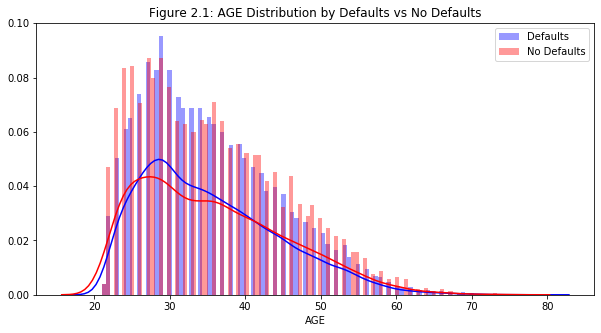

In [23]:
#Distribution of Age with defaults and no defaults
plt.figure(figsize = (10,5))
plt.title('Figure 2.1: AGE Distribution by Defaults vs No Defaults')
CAD = df.loc[df['default.payment.next.month']==0]['AGE']
CAD1 = df.loc[df['default.payment.next.month']==1]['AGE']
sn.distplot(CAD, bins = 100, color = 'blue')
sn.distplot(CAD1, bins = 100, color = 'red')
plt.xlabel('AGE')
plt.legend(labels=['Defaults','No Defaults'])
plt.show()

From the above graph we can conclude that the no. of defaulters are high in the range of age(25-40).Eventually it reduces on crossing 40 years of age and keep on reducing.

**Distribution of credit amount defaults and no defaults**

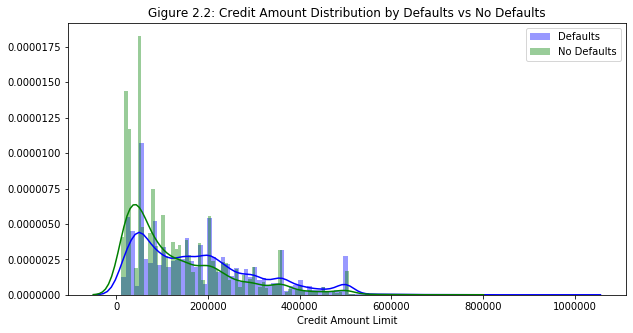

In [24]:
#Distribution of credit amount defaults and no defaults
plt.figure(figsize = (10,5))
plt.title('Gigure 2.2: Credit Amount Distribution by Defaults vs No Defaults')
CAD = df.loc[df['default.payment.next.month']==0]['LIMIT_BAL']
CAD1 = df.loc[df['default.payment.next.month']==1]['LIMIT_BAL']
sn.distplot(CAD, bins = 100, color = 'blue')
sn.distplot(CAD1, bins = 100, color = 'green')
plt.xlabel('Credit Amount Limit')
plt.legend(labels=['Defaults','No Defaults'])
plt.show()


**Distribution of defaults and no defaults with respect to Gender**<br>
The Plot below shows us that there are more number of females defaulting.


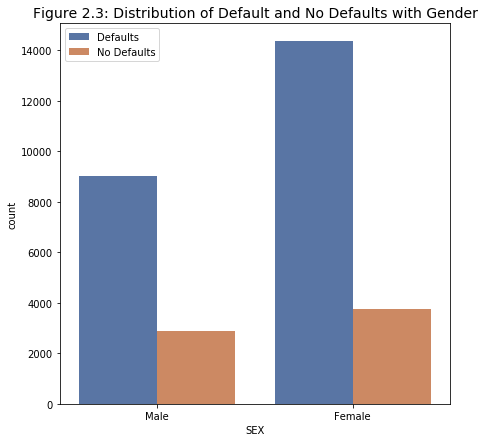

In [25]:
#Distribution of defaults and no defaults with respect to Gender

plt.figure(figsize = (7,7))
plt.title('Figure 2.3: Distribution of Default and No Defaults with Gender', fontsize = 14)
sn.color_palette()
PLOT2 = sn.countplot(x='SEX', data=df,hue="default.payment.next.month", palette="deep")
PLOT2.set_xticklabels(['Male','Female'])
plt.legend(labels=(['Defaults','No Defaults']))
plt.show()


**Distribution of defaults and no defaults with respect to Marital Status**<br>


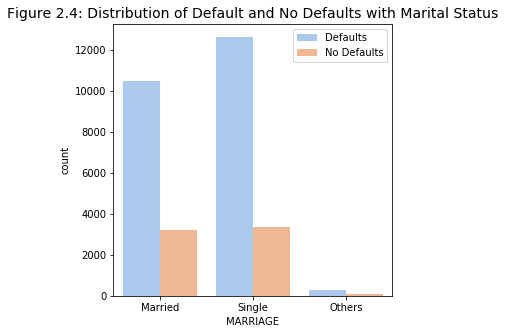

In [26]:
#plot2 Distribution of credit amount defaults and no defaults
plt.figure(figsize = (5,5))
plt.title('Figure 2.4: Distribution of Default and No Defaults with Marital Status', fontsize = 14)
sn.color_palette()
PLOT2 = sn.countplot(x='MARRIAGE', data=df, hue="default.payment.next.month", palette="pastel")
PLOT2.set_xticklabels(['Married','Single','Others'])
plt.legend(labels=(['Defaults','No Defaults']))
plt.show()



The Plot above shows us that there are more Singles defaulting.

**Credit Amount distribution by SEX** <br>

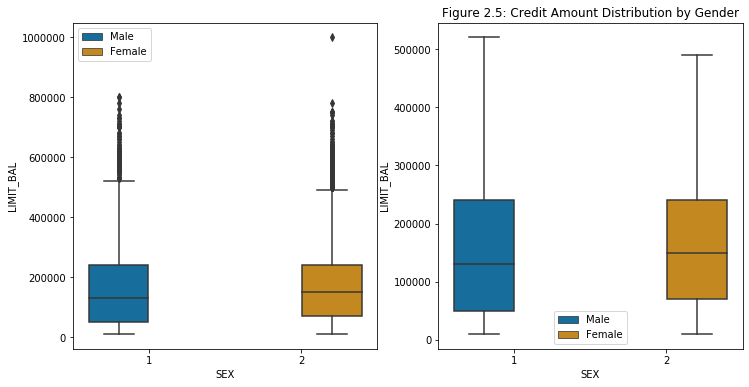

In [27]:
#plot3 Credit Amount distribution by SEX 
fig, (p1, p2) = plt.subplots(ncols=2, figsize=(12,6))
plt.title('Figure 2.5: Credit Amount Distribution by Gender')
s1 = sn.boxplot(ax = p1, x="SEX", y="LIMIT_BAL", hue= "SEX",data=df, palette="colorblind",showfliers=True)
s = sn.boxplot(ax = p2, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="colorblind",showfliers=False)
handles, _ = s1.get_legend_handles_labels()
handles, _ = s.get_legend_handles_labels()
s1.legend(handles, ["Male", "Female"])
s.legend(handles, ["Male", "Female"])
plt.show()

The credit limit number is fairly balanced between the genders. The males have a slightly larger Q3 and Q4 and a lower mean. The Female has a higher outlier maximum value.

**Credit Amount distribution by Marital Status** <br>



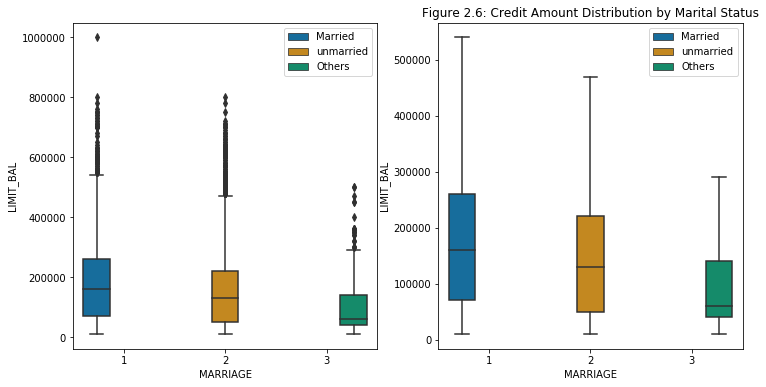

In [28]:
#plot4 Credit Amount distribution by Marriage 
fig, (p1, p2) = plt.subplots(ncols=2, figsize=(12,6))
plt.title('Figure 2.6: Credit Amount Distribution by Marital Status')
s1 = sn.boxplot(ax = p1, x="MARRIAGE", y="LIMIT_BAL", hue= "MARRIAGE",data=df, palette="colorblind",showfliers=True)
s = sn.boxplot(ax = p2, x="MARRIAGE", y="LIMIT_BAL", hue="MARRIAGE",data=df, palette="colorblind",showfliers=False)
handles, _ = s1.get_legend_handles_labels()
handles, _ = s.get_legend_handles_labels()
s1.legend(handles, ["Married", "unmarried", "Others"])
s.legend(handles, ["Married", "unmarried", "Others"])
plt.show()

The distribution of credit card limit is higher for Married group as compared to unmarried and others.

## Three Variable Visualisation <a name="TV"></a>

**Credit Amount distribution by Defaults and No Defaults and SEX**<br>

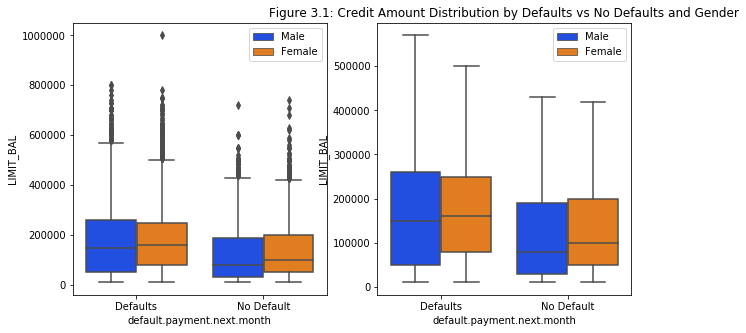

In [29]:
#plot1 Credit Amount distribution by Defaults and No Defaults and SEX
fig, (p1, p2) = plt.subplots(ncols=2, figsize=(10,5))
plt.title('Figure 3.1: Credit Amount Distribution by Defaults vs No Defaults and Gender')
s1 = sn.boxplot(ax = p1, x="default.payment.next.month", y="LIMIT_BAL", hue= "SEX",data=df, palette="bright",showfliers=True)
s = sn.boxplot(ax = p2, x="default.payment.next.month", y="LIMIT_BAL", hue="SEX",data=df, palette="bright",showfliers=False)
s1.set_xticklabels(['Defaults','No Default'])
s.set_xticklabels(['Defaults','No Default'])
handles, _ = s1.get_legend_handles_labels()
handles, _ = s.get_legend_handles_labels()
s1.legend(handles, ["Male", "Female"])
s.legend(handles, ["Male", "Female"])
plt.show()

Male's mean values are generally lower than female's for both Defaulting and Not Defaulting.


**Credit Amount distribution by Defaults and No Defaults and Martial Status**<br>

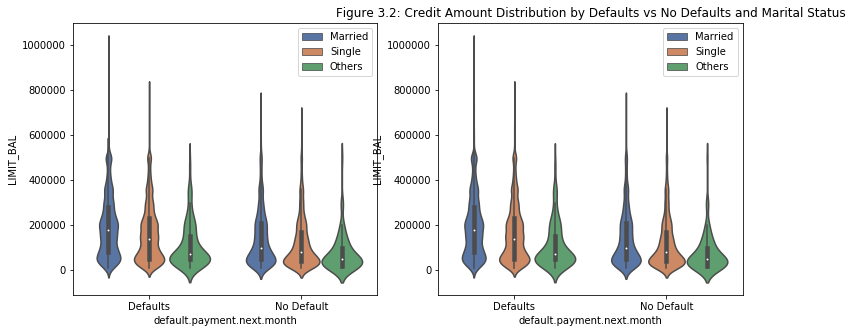

In [30]:
#plot2 Credit Amount distribution by Defaults and No Defaults and Martial Status

fig, (p1, p2) = plt.subplots(ncols=2, figsize=(12,5))
plt.title('Figure 3.2: Credit Amount Distribution by Defaults vs No Defaults and Marital Status')
s1 = sn.violinplot(ax = p1, x="default.payment.next.month", y="LIMIT_BAL", hue= "MARRIAGE",data=df, palette="deep",showfliers=True)
s = sn.violinplot(ax = p2, x="default.payment.next.month", y="LIMIT_BAL", hue="MARRIAGE",data=df, palette="deep",showfliers=False)
s1.set_xticklabels(['Defaults','No Default'])
s.set_xticklabels(['Defaults','No Default'])
handles, _ = s1.get_legend_handles_labels()
handles, _ = s.get_legend_handles_labels()
s1.legend(handles, ["Married", "Single", "Others"])
s.legend(handles, ["Married", "Single", "Others"])
plt.show()

We see from the violin plot that clients who are married tend to have a higher median to default as comparred to singles.

**Credit Amount distribution by Defaults and No Defaults and Education**<br> 

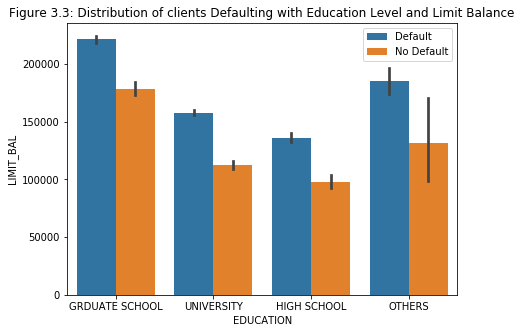

In [31]:
#plot3 Credit Amount distribution by Defaults and No Defaults and Education
plt.figure(figsize = (7,5))
plt.title('Figure 3.3: Distribution of clients Defaulting with Education Level and Limit Balance')
sn.color_palette()
PLOT3 = sn.barplot(x=df['EDUCATION'], y= df['LIMIT_BAL'],hue=df['default.payment.next.month'])
handles, _ = PLOT3.get_legend_handles_labels()
PLOT3.legend(handles, ["Default", "No Default"])
PLOT3.set_xticklabels(['GRDUATE SCHOOL','UNIVERSITY', 'HIGH SCHOOL','OTHERS'])
plt.show()

The barplot above shows us clients whose education level is University and Graduate school are Defaulting have higher amount of the credit limit.

**Credit Amount distribution by Defaults and No Defaults and Age**<br>


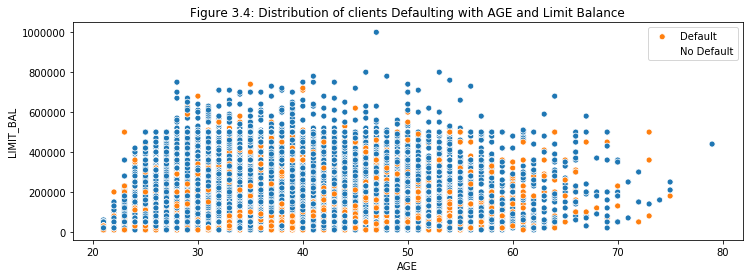

In [32]:
#plot4 Credit Amount distribution by Defaults and No Defaults and Age
plt.figure(figsize=(12,4))
plt.title('Figure 3.4: Distribution of clients Defaulting with AGE and Limit Balance')
P1 = sn.scatterplot(x="AGE", y="LIMIT_BAL",
             hue="default.payment.next.month",
             data=df)
P1.legend(["Default", "No Default"])
plt.show()



We see that the Limit balance increases with age for both males and females until about 30 years, where they oscillate and peak between 55-60.

**Summary**: <br>This dataset is based on credit card defaulters in Taiwan 2005. 
In our Analysis, our target variable is **default.payment.next.month**.<br>
From the exploratory analysis, we have reached on few points:<br>
1)There are more number of Female Credit clients as compared to Male clients in Taiwan.<br>
2)University folks are more prone to be defaulters as compared to Graduates and High School.<br>
3)The Number of credit card users are high in between 25-40 years of age, <br> but gradually decreases which depicts that increase in age reduces usage of credit cards.<br>
And there is a high probability that no. of defaulters is more as compared to no. of non defaulters.


# References:<a name="R"></a>


- Taiwan’s cash-card write-offs hit record high [Review of Taiwan’s cash-card write-offs hit record high].<a name="1"></a>
- Wang, E. (n.d.). Review of Taiwan’s Credit Card Crisis https://sevenpillarsinstitute.org/case-studies/taiwans-credit-card-crisis/<a name="2"></a>
- Financial Times. https://www.ft.com/content/8c9e45e2-2f47-11da-8b51-00000e2511c8<a name="3"></a>
- UCI Machine Learning Repository: default of credit card clients Data Set. (2016). Uci.edu. https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
- Default of Credit Card Clients Dataset. (n.d.). Kaggle.com. https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset